In [1]:
import os 
import numpy as np
from utils.data_utils import load_obj, SAVE_DIR, UD_PARENT, RESULTS_DIR, LEX_PATH_SET, save_obj
from utils import extract_pool
from utils.optim_utils import optim_pool
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
import seaborn
from tqdm import tqdm 


/usr/local/lib/python3.7/site-packages/xarray/core/merge.py:16: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


Loading lookup from /usr/local/lib/python3.7/site-packages/brainio_collection/lookup.csv


/usr/local/lib/python3.7/site-packages/brainio_base/assemblies.py:224: FutureWarning: The inplace argument has been deprecated and will be removed in a future version of xarray.
  xr_data.set_index(append=True, inplace=True, **coords_d)


In [2]:
extract_id=['group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-activation-bench=None-ave=False',
            'group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp-bench=Pereira2018-encoding-weights-ave=False',
'group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp-bench=Fedorenko2016v3-encoding-weights-ave=False'
]

Pereira_control=['group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp_Pereira_exp1-bench=Pereira2018-encoding-weights-ave=False',
                'group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp_Pereira_exp2-bench=Pereira2018-encoding-weights-ave=False']

#'group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp-bench=Pereira2018-encoding-weights-ave=False',
#'group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-activation-bench=None-ave=False',
#'group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp-bench=Fedorenko2016v3-encoding-weights-ave=False',

control=['group=second_best_performing_pereira-dataset=ud_sentences_token_filter_v3-activation-bench=None-ave=False',
'group=second_best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp-bench=Fedorenko2016v3-encoding-weights-ave=False',
'group=second_best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp-bench=Pereira2018-encoding-weights-ave=False']

In [3]:
#extract_id=['group=set_3-dataset=ud_sentences_filter_v2-brain_resp-bench=Fedorenko2016v3-encoding-weights_v2-ave=False',
#           'group=set_3-dataset=ud_sentences_filter_v2-network_act-bench=None-ave=False']
optim_id=['coordinate_ascent-obj=D_s-n_iter=2000-n_samples=300-n_init=3']

In [4]:
optim_files=[]
optim_results=[]
for ext in extract_id:
    for optim in optim_id:
        optim_file=os.path.join(RESULTS_DIR,f"results_{ext}_{optim}.pkl")
        optim_files.append(optim_file)
        optim_results.append(load_obj(optim_file))

loading /om/user/ehoseini/MyData/sent_sampling/results/results_group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-activation-bench=None-ave=False_coordinate_ascent-obj=D_s-n_iter=2000-n_samples=300-n_init=3.pkl
loading /om/user/ehoseini/MyData/sent_sampling/results/results_group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp-bench=Pereira2018-encoding-weights-ave=False_coordinate_ascent-obj=D_s-n_iter=2000-n_samples=300-n_init=3.pkl
loading /om/user/ehoseini/MyData/sent_sampling/results/results_group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp-bench=Fedorenko2016v3-encoding-weights-ave=False_coordinate_ascent-obj=D_s-n_iter=2000-n_samples=300-n_init=3.pkl


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator


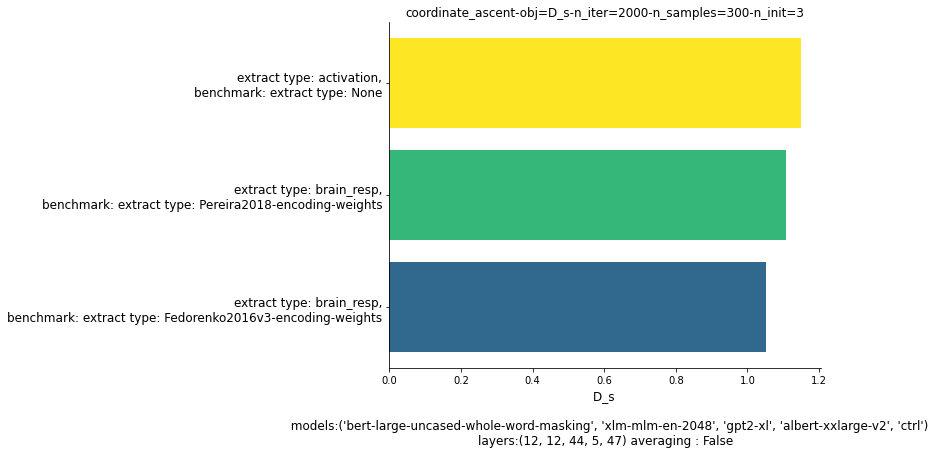

In [5]:
fig = plt.figure(figsize=[15,8])
ax = fig.add_axes([.1,.1,.4,.6])

cmap=cm.get_cmap('viridis_r')

alph_col=cmap(np.divide(range(len(optim_results)),len(optim_results)))
tick_l=[]
tick=[]
for idx, res in enumerate(optim_results):
    ax.barh(idx,res['optimized_d'],color=alph_col[[idx],:],label=res['optimizatin_name'])
    ext_obj=extract_pool[res['extractor_name']]()
    tick_l.append(f"extract type: {ext_obj.extract_type},\nbenchmark: extract type: {ext_obj.extract_benchmark}")
    tick.append(idx)

    
ax.set_xlabel(f"D_s \n\n  models:{ext_obj.model_spec}\nlayers:{ext_obj.layer_spec} averaging : {ext_obj.average_sentence}",fontsize=12)
ax.set_yticklabels(tick_l,fontsize=12)
ax.set_yticks(tick)
ax.set_title(res['optimizatin_name'],fontsize=12)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
#ax.legend(bbox_to _anchor=(1.1, .85), frameon=True,fontsize=12)
ax.invert_yaxis()
#fig.savefig(os.path.join(Analysis_path,'DV_test_gamma_alpha_is_0.pdf'))

False

In [6]:
xy_val=[[len(set(x['optimized_S']).intersection(set(y['optimized_S']))) for y in optim_results] for x in optim_results ]
x_cord=[[(idx,f"{x['benchmark']}\n{x['data_type']}\n") for y in optim_results] for idx, x in enumerate(optim_results) ]
y_cord=[[(idy,f"{x['data_type']}\n{x['optimizatin_name']}") for idy,y in enumerate(optim_results)] for x in optim_results ]
x_cord1=[x[0] for x in x_cord]
y_cord1=y_cord[0]

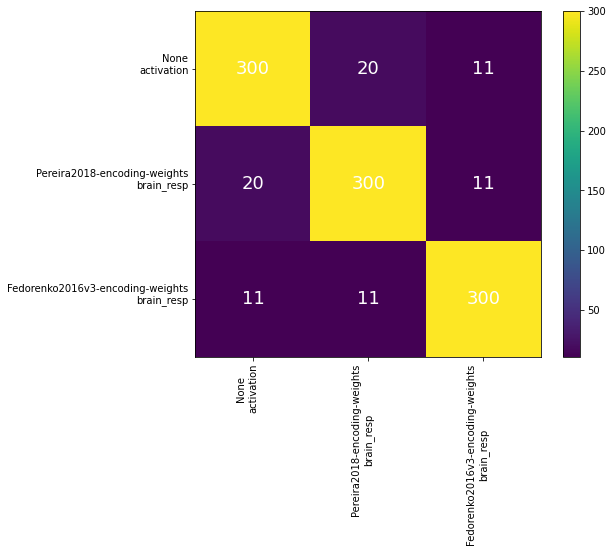

In [7]:
fig = plt.figure(figsize=[15,8])
ax = fig.add_axes([.1,.1,.4,.6])
cmap=cm.get_cmap('viridis_r')
tick_l=[]
tick=[]
im=ax.imshow(np.stack(xy_val))
ytick=[y[0] for y in y_cord1]
yticklabel=[y[1] for y in y_cord1]

xtick=[x[0] for x in x_cord1]
xticklabel=[x[1] for x in x_cord1]

ax.set_xticks(xtick)
ax.set_xticklabels(xticklabel,rotation = 90)

ax.set_yticks(xtick)
ax.set_yticklabels(xticklabel,rotation = 0)
fig.colorbar(im , orientation='vertical')

for i in range(np.stack(xy_val).shape[0]):
    for j in range(np.stack(xy_val).shape[1]):
        text = ax.text(j, i, np.stack(xy_val)[i,j],
                       ha="center", va="center", color="w",fontsize=18)



In [8]:
np.stack(xy_val)

array([[300,  20,  11],
       [ 20, 300,  11],
       [ 11,  11, 300]])

In [9]:
lex_names=[x['name'] for x in LEX_PATH_SET]
sample_values=[]
for idx, res in enumerate(optim_results):
    ext_obj=extract_pool[res['extractor_name']]()
    ext_obj.load_dataset()
    lex_values=[[np.nanmean(sent_dat[lex_name]) for lex_name in lex_names] for sent_dat in ext_obj.data_]
    values=[lex_values[id] for id in res['optimized_S']]
    sample_values.append(np.stack(values))

loading /om/user/ehoseini/MyData/Universal Dependencies 2.6/ud_sentence_data_token_filter_v3_no_dup.pkl


901it [00:00, 184705.18it/s]
901it [00:00, 179511.11it/s]
901it [00:00, 171308.61it/s]
901it [00:00, 155402.09it/s]
901it [00:00, 173010.48it/s]
901it [00:00, 146316.71it/s]
901it [00:00, 180195.88it/s]
901it [00:00, 213808.65it/s]
902it [00:00, 215386.41it/s]
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  


loading /om/user/ehoseini/MyData/Universal Dependencies 2.6/ud_sentence_data_token_filter_v3_no_dup.pkl


901it [00:00, 249822.69it/s]
901it [00:00, 230122.27it/s]
901it [00:00, 174633.45it/s]
901it [00:00, 216268.05it/s]
901it [00:00, 219841.06it/s]
901it [00:00, 224130.71it/s]
901it [00:00, 219662.17it/s]
901it [00:00, 215589.47it/s]
902it [00:00, 219931.53it/s]


loading /om/user/ehoseini/MyData/Universal Dependencies 2.6/ud_sentence_data_token_filter_v3_no_dup.pkl


901it [00:00, 243622.22it/s]
901it [00:00, 230515.30it/s]
901it [00:00, 223613.49it/s]
901it [00:00, 222520.63it/s]
901it [00:00, 214951.82it/s]
901it [00:00, 218810.02it/s]
901it [00:00, 217650.63it/s]
901it [00:00, 215319.24it/s]
902it [00:00, 213719.48it/s]


/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

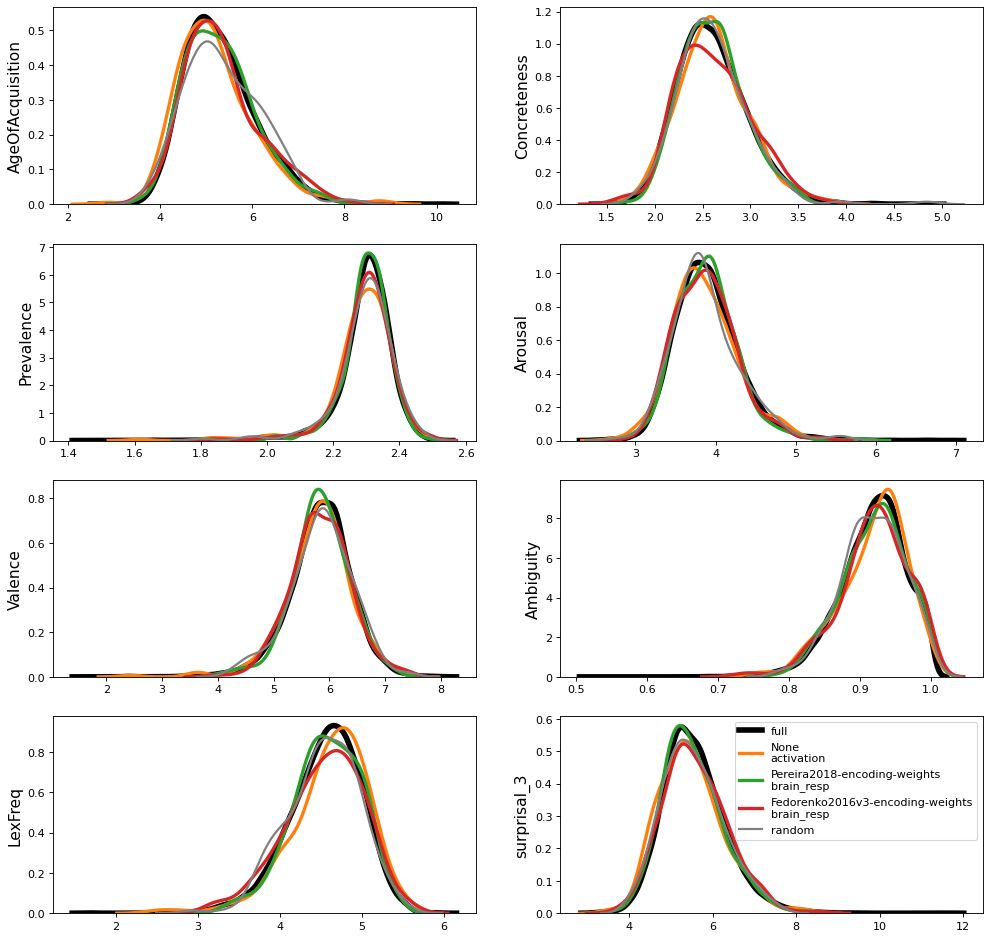

In [10]:
plt.figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')
for i in range(1, len(lex_names)+1):
    plt.subplot(4, 2, i)
    
    seaborn.distplot(np.stack(lex_values)[:,i-1],bins=50,label='full',norm_hist=True,hist=False,kde_kws={"lw": 5,"color":'k'})
    for idx,val in enumerate(sample_values):
        optim_spec=optim_results[idx]['optimizatin_name'].split('-')
        name=f"{optim_results[idx]['benchmark']}\n{optim_results[idx]['data_type']}"
        seaborn.distplot(val[:,i-1],bins=50,label=name,norm_hist=True,hist=False,kde_kws={"lw": 3})   
    #seaborn.distplot(select_s_feat_mean_new[i-1],bins=50,label='sample',norm_hist=True)
    #ax=plt.gca()
    #ax.set_xticks(np.linspace(s_with_all_feat[i-1].min(),s_with_all_feat[i-1].max(),num=10))
    random_set=np.random.randint(0,np.stack(lex_values).shape[0],200)
    seaborn.distplot(np.stack(lex_values)[random_set,i-1],bins=50,label='random',norm_hist=True,hist=False,kde_kws={"lw": 2,"color": (.5,.5,.5)})
    if i==len(lex_names):
        plt.legend(loc='upper right')
    plt.ylabel(lex_names[i-1],fontsize=14);


# compute the predicted brain based on neural activation list

In [11]:
benmarks=[x['benchmark'] for x in optim_results]
data_type=[x['data_type'] for x in optim_results]

In [12]:
extract_id=['group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp-bench=Pereira2018-encoding-weights-ave=False',
'group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-activation-bench=None-ave=False',
'group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp-bench=Fedorenko2016v3-encoding-weights-ave=False'
]

Pereira_control=['group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp_Pereira_exp1-bench=Pereira2018-encoding-weights-ave=False',
                'group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp_Pereira_exp2-bench=Pereira2018-encoding-weights-ave=False']


In [13]:
ds_transform=[dict(src='group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp-bench=Pereira2018-encoding-weights-ave=False',
                  trgs=['group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-activation-bench=None-ave=False',
                      'group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp-bench=Fedorenko2016v3-encoding-weights-ave=False'],
                  optim='coordinate_ascent-obj=D_s-n_iter=1000-n_samples=300-n_init=1'),
              dict(src='group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-activation-bench=None-ave=False',
                   trgs=['group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp-bench=Fedorenko2016v3-encoding-weights-ave=False',
                       'group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp-bench=Pereira2018-encoding-weights-ave=False'],
                  optim='coordinate_ascent-obj=D_s-n_iter=1000-n_samples=300-n_init=1'),
              
             dict(src='group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp-bench=Fedorenko2016v3-encoding-weights-ave=False',
                  trgs=['group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-activation-bench=None-ave=False',
                      'group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp-bench=Pereira2018-encoding-weights-ave=False'],
                  optim='coordinate_ascent-obj=D_s-n_iter=1000-n_samples=300-n_init=1'),
]


In [14]:
PAIR_COMPARISON=[]
for idx, ds_t in enumerate(ds_transform):
    result=dict()
    result['idx']=idx
    optim_file=os.path.join(RESULTS_DIR,f"results_{ds_t['src']}_{ds_t['optim']}.pkl")
    res=load_obj(optim_file)
    ext_obj=extract_pool[res['extractor_name']]()
    ext_obj.load_dataset()
    ext_obj()
    optimizer_obj = optim_pool[ds_t['optim']]()
    optimizer_obj.load_extractor(ext_obj)
    ds_src=optimizer_obj.mod_objective_function(res['optimized_S'])
    result[f"SRC: {res['data_type']}; {res['benchmark']}"]=ds_src
    # 
    for trg in ds_t['trgs']:
            optim_file=os.path.join(RESULTS_DIR,f"results_{trg}_{optim}.pkl")
            res_trg=load_obj(optim_file)
            ds_trg=optimizer_obj.mod_objective_function(res_trg['optimized_S'])
            result[f"TRG: {res_trg['data_type']}; {res_trg['benchmark']}"]=ds_trg
     
    # get the random set 
    ds_rand=[]
    for k in tqdm(enumerate(range(50))):
        sent_random=list(np.random.choice(optimizer_obj.N_S,optimizer_obj.N_s))
        ds_rand.append(optimizer_obj.mod_objective_function(sent_random))
    result[f"RND: {res['data_type']}; {res['benchmark']}"]=ds_rand
    PAIR_COMPARISON.append(result)

loading /om/user/ehoseini/MyData/sent_sampling/results/results_group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp-bench=Pereira2018-encoding-weights-ave=False_coordinate_ascent-obj=D_s-n_iter=1000-n_samples=300-n_init=1.pkl
loading /om/user/ehoseini/MyData/Universal Dependencies 2.6/ud_sentence_data_token_filter_v3_no_dup.pkl


901it [00:00, 245218.86it/s]
901it [00:00, 222076.04it/s]
901it [00:00, 186916.01it/s]
901it [00:00, 212941.22it/s]
901it [00:00, 184093.33it/s]
901it [00:00, 219828.28it/s]
901it [00:00, 218052.50it/s]
901it [00:00, 215356.05it/s]
902it [00:00, 170755.65it/s]


extracting brain response for bert-large-uncased-whole-word-masking
ud_sentences_token_filter_v3_bert-large-uncased-whole-word-masking_layer_12_brain_resp_Pereira2018-encoding-weights_ave_False.pkl already exists, loading...
loading /om/user/ehoseini/MyData/sent_sampling/ud_sentences_token_filter_v3_bert-large-uncased-whole-word-masking_layer_12_brain_resp_Pereira2018-encoding-weights_ave_False.pkl
computed brain responses
extracting brain response for xlm-mlm-en-2048
ud_sentences_token_filter_v3_xlm-mlm-en-2048_layer_12_brain_resp_Pereira2018-encoding-weights_ave_False.pkl already exists, loading...
loading /om/user/ehoseini/MyData/sent_sampling/ud_sentences_token_filter_v3_xlm-mlm-en-2048_layer_12_brain_resp_Pereira2018-encoding-weights_ave_False.pkl
computed brain responses
extracting brain response for gpt2-xl
ud_sentences_token_filter_v3_gpt2-xl_layer_44_brain_resp_Pereira2018-encoding-weights_ave_False.pkl already exists, loading...
loading /om/user/ehoseini/MyData/sent_sampling/

50it [02:05,  2.52s/it]


loading /om/user/ehoseini/MyData/sent_sampling/results/results_group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-activation-bench=None-ave=False_coordinate_ascent-obj=D_s-n_iter=1000-n_samples=300-n_init=1.pkl
loading /om/user/ehoseini/MyData/Universal Dependencies 2.6/ud_sentence_data_token_filter_v3_no_dup.pkl


901it [00:00, 228301.09it/s]
901it [00:00, 189294.12it/s]
901it [00:00, 175819.67it/s]
901it [00:00, 217625.56it/s]
901it [00:00, 222311.19it/s]
901it [00:00, 222468.23it/s]
901it [00:00, 221321.69it/s]
901it [00:00, 220675.50it/s]
902it [00:00, 219154.39it/s]


extracting network activations for bert-large-uncased-whole-word-masking
ud_sentences_token_filter_v3_bert-large-uncased-whole-word-masking_layer_12_activation_ave_False.pkl already exists, loading...
loading /om/user/ehoseini/MyData/sent_sampling/ud_sentences_token_filter_v3_bert-large-uncased-whole-word-masking_layer_12_activation_ave_False.pkl
adding activations to set
extracting network activations for xlm-mlm-en-2048
ud_sentences_token_filter_v3_xlm-mlm-en-2048_layer_12_activation_ave_False.pkl already exists, loading...
loading /om/user/ehoseini/MyData/sent_sampling/ud_sentences_token_filter_v3_xlm-mlm-en-2048_layer_12_activation_ave_False.pkl
adding activations to set
extracting network activations for gpt2-xl
ud_sentences_token_filter_v3_gpt2-xl_layer_44_activation_ave_False.pkl already exists, loading...
loading /om/user/ehoseini/MyData/sent_sampling/ud_sentences_token_filter_v3_gpt2-xl_layer_44_activation_ave_False.pkl
adding activations to set
extracting network activations 

50it [00:10,  4.71it/s]


loading /om/user/ehoseini/MyData/sent_sampling/results/results_group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp-bench=Fedorenko2016v3-encoding-weights-ave=False_coordinate_ascent-obj=D_s-n_iter=1000-n_samples=300-n_init=1.pkl
loading /om/user/ehoseini/MyData/Universal Dependencies 2.6/ud_sentence_data_token_filter_v3_no_dup.pkl


901it [00:00, 235764.42it/s]
901it [00:00, 214976.27it/s]
901it [00:00, 211097.53it/s]
901it [00:00, 206608.05it/s]
901it [00:00, 202035.17it/s]
901it [00:00, 213663.59it/s]
901it [00:00, 216033.15it/s]
901it [00:00, 174916.36it/s]
902it [00:00, 214361.28it/s]


extracting brain response for bert-large-uncased-whole-word-masking
ud_sentences_token_filter_v3_bert-large-uncased-whole-word-masking_layer_12_brain_resp_Fedorenko2016v3-encoding-weights_ave_False.pkl already exists, loading...
loading /om/user/ehoseini/MyData/sent_sampling/ud_sentences_token_filter_v3_bert-large-uncased-whole-word-masking_layer_12_brain_resp_Fedorenko2016v3-encoding-weights_ave_False.pkl
computed brain responses
extracting brain response for xlm-mlm-en-2048
ud_sentences_token_filter_v3_xlm-mlm-en-2048_layer_12_brain_resp_Fedorenko2016v3-encoding-weights_ave_False.pkl already exists, loading...
loading /om/user/ehoseini/MyData/sent_sampling/ud_sentences_token_filter_v3_xlm-mlm-en-2048_layer_12_brain_resp_Fedorenko2016v3-encoding-weights_ave_False.pkl
computed brain responses
extracting brain response for gpt2-xl
ud_sentences_token_filter_v3_gpt2-xl_layer_44_brain_resp_Fedorenko2016v3-encoding-weights_ave_False.pkl already exists, loading...
loading /om/user/ehoseini/M

50it [00:59,  1.18s/it]


In [15]:
Pereira_rand=PAIR_COMPARISON[0]['RND: brain_resp; Pereira2018-encoding-weights']

loading /om/user/ehoseini/MyData/sent_sampling/results/results_group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp-bench=Pereira2018-encoding-weights-ave=False_coordinate_ascent-obj=D_s-n_iter=1000-n_samples=300-n_init=1.pkl
loading /om/user/ehoseini/MyData/sent_sampling/results/results_group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-activation-bench=None-ave=False_coordinate_ascent-obj=D_s-n_iter=2000-n_samples=300-n_init=3.pkl
loading /om/user/ehoseini/MyData/sent_sampling/results/results_group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp-bench=Fedorenko2016v3-encoding-weights-ave=False_coordinate_ascent-obj=D_s-n_iter=2000-n_samples=300-n_init=3.pkl
loading /om/user/ehoseini/MyData/sent_sampling/results/results_group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-activation-bench=None-ave=False_coordinate_ascent-obj=D_s-n_iter=1000-n_samples=300-n_init=1.pkl
loading /om/user/ehoseini/MyData/sent_sa

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
/usr/local/lib/python3.7/site-packages/matplotlib/text.py:1163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


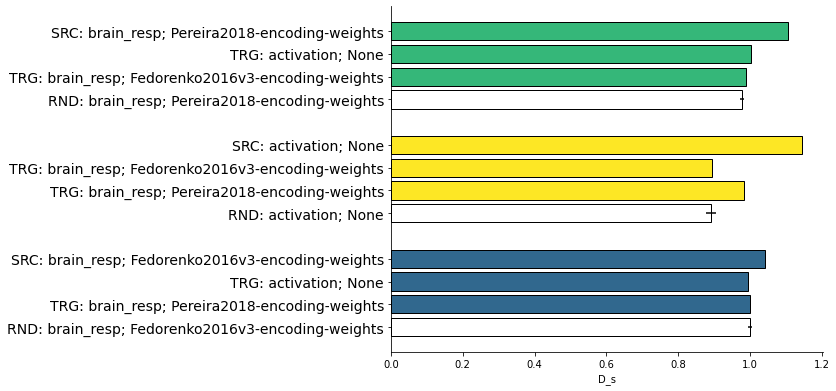

In [16]:
fig = plt.figure(figsize=[15,8])
ax = fig.add_axes([.1,.1,.4,.6])
cmap=cm.get_cmap('viridis_r')
alph_col=cmap(np.divide(range(len(PAIR_COMPARISON)),len(PAIR_COMPARISON)))
tick_l=[]
tick=[]
src_tick=[]
src_tick_l=[]
alph_col1=alph_col[(1,0,2),:]
for idx, pair in enumerate(PAIR_COMPARISON):
    ds_t=ds_transform[pair['idx']]
    optim_file=os.path.join(RESULTS_DIR,f"results_{ds_t['src']}_{ds_t['optim']}.pkl")
    res=load_obj(optim_file)
    src=[pair[f"SRC: {res['data_type']}; {res['benchmark']}"]]
    src_tick_l.append(f"SRC: {res['data_type']}; {res['benchmark']}")
    for trg in ds_t['trgs']:
        optim_file=os.path.join(RESULTS_DIR,f"results_{trg}_{optim}.pkl")
        res_trg=load_obj(optim_file)
        pair[f"TRG: {res_trg['data_type']}; {res_trg['benchmark']}"]
        src.append(pair[f"TRG: {res_trg['data_type']}; {res_trg['benchmark']}"])
        src_tick_l.append(f"TRG: {res_trg['data_type']}; {res_trg['benchmark']}")
    ax.barh(np.arange(len(src))+idx*5,src,edgecolor=(0,0,0),color=alph_col1[idx,:])
    
    ax.set_yticklabels(src_tick)
    # random set 
    src_rand=pair[f"RND: {res['data_type']}; {res['benchmark']}"]
    src_tick_l.append(f"RND: {res['data_type']}; {res['benchmark']}")
    ax.barh(len(src)+idx*5,np.mean(src_rand),xerr=np.std(src_rand),color=(1,1,1),edgecolor=(0,0,0))
    

    src_tick.append(np.arange(len(src)+1)+idx*5)
ax.invert_yaxis()
    
ax.set_xlabel('D_s')
ax.set_yticks(np.array(src_tick).flatten())
ax.set_yticklabels(src_tick_l,fontsize=14)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
#ax.set
#ax.spines["top"].set_visible(False)
#ax.spines["right"].set_visible(False)
#ax.legend(bbox_to_anchor=(1.1, .85), frameon=True,fontsize=12)
#fig.savefig(os.path.join(Analysis_path,'DV_test_gamma_alpha_is_0.pdf'))

# control 1 

In [148]:
extract_group=[['group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-activation-bench=None-ave=False',
            'group=second_best_performing_pereira-dataset=ud_sentences_token_filter_v3-activation-bench=None-ave=False'],
            ['group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp-bench=Pereira2018-encoding-weights-ave=False',
             'group=second_best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp-bench=Pereira2018-encoding-weights-ave=False'],
['group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp-bench=Fedorenko2016v3-encoding-weights-ave=False',

'group=second_best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp-bench=Fedorenko2016v3-encoding-weights-ave=False']]

Pereira_control=['group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp_Pereira_exp1-bench=Pereira2018-encoding-weights-ave=False',
                'group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp_Pereira_exp2-bench=Pereira2018-encoding-weights-ave=False']

#'group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp-bench=Pereira2018-encoding-weights-ave=False',
#'group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-activation-bench=None-ave=False',
#'group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp-bench=Fedorenko2016v3-encoding-weights-ave=False',

control=['group=second_best_performing_pereira-dataset=ud_sentences_token_filter_v3-activation-bench=None-ave=False',
'group=second_best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp-bench=Fedorenko2016v3-encoding-weights-ave=False',
'group=second_best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp-bench=Pereira2018-encoding-weights-ave=False']

In [149]:
optim_files=[]
optim_group=[]
for ext in extract_group:
    optim_results=[]
    for ex in ext:
        for optim in optim_id:
            optim_file=os.path.join(RESULTS_DIR,f"results_{ex}_{optim}.pkl")
            optim_files.append(optim_file)
            optim_results.append(load_obj(optim_file))
        
    optim_group.append(optim_results)

loading /om/user/ehoseini/MyData/sent_sampling/results/results_group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-activation-bench=None-ave=False_coordinate_ascent-obj=D_s-n_iter=1000-n_samples=300-n_init=1.pkl
loading /om/user/ehoseini/MyData/sent_sampling/results/results_group=second_best_performing_pereira-dataset=ud_sentences_token_filter_v3-activation-bench=None-ave=False_coordinate_ascent-obj=D_s-n_iter=1000-n_samples=300-n_init=1.pkl
loading /om/user/ehoseini/MyData/sent_sampling/results/results_group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp-bench=Pereira2018-encoding-weights-ave=False_coordinate_ascent-obj=D_s-n_iter=1000-n_samples=300-n_init=1.pkl
loading /om/user/ehoseini/MyData/sent_sampling/results/results_group=second_best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp-bench=Pereira2018-encoding-weights-ave=False_coordinate_ascent-obj=D_s-n_iter=1000-n_samples=300-n_init=1.pkl
loading /om/user/ehoseini/MyDa

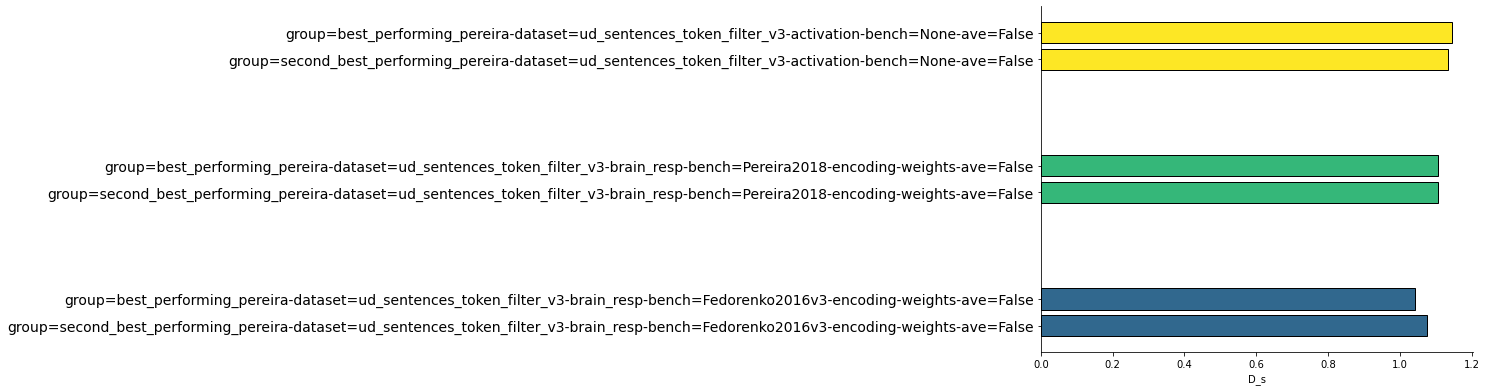

In [151]:
fig = plt.figure(figsize=[15,8])
ax = fig.add_axes([.1,.1,.4,.6])

cmap=cm.get_cmap('viridis_r')

alph_col=cmap(np.divide(range(len(optim_group)),len(optim_group)))
tick_l=[]
tick=[]
for idx, results in enumerate(optim_group):
    group_res=[]
    for res in results:
        group_res.append(res['optimized_d'])

        
        
    #pair[f"TRG: {res_trg['group']}; {res_trg['benchmark']}"]
    #    src.append(pair[f"TRG: {res_trg['data_type']}; {res_trg['benchmark']}"])
        tick_l.append(res['extractor_name'])
        tick
    ax.barh(np.arange(len(group_res))+idx*5,group_res,edgecolor=(0,0,0),color=alph_col[idx,:])
    tick.append(np.arange(len(group_res))+idx*5)
    #ax.barh(idx,res['optimized_d'],color=alph_col[[idx],:],label=res['optimizatin_name'])
    #ext_obj=extract_pool[res['extractor_name']]()
    #tick_l.append(f"extract type: {ext_obj.extract_type},\nbenchmark: extract type: {ext_obj.extract_benchmark}")
    #tick.append(idx)
ax.invert_yaxis()
    
ax.set_xlabel('D_s')
ax.set_yticks(np.array(tick).flatten())
ax.set_yticklabels(tick_l,fontsize=14)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

    
#ax.set_xlabel(f"D_s \n\n  models:{ext_obj.model_spec}\nlayers:{ext_obj.layer_spec} averaging : {ext_obj.average_sentence}",fontsize=12)
#ax.set_yticklabels(tick_l,fontsize=12)
#ax.set_yticks(tick)
#ax.set_title(res['optimizatin_name'],fontsize=12)
#ax.spines["top"].set_visible(False)
#ax.spines["right"].set_visible(False)
#ax.legend(bbox_to _anchor=(1.1, .85), frameon=True,fontsize=12)
#ax.invert_yaxis()
#fig.savefig(os.path.join(Analysis_path,'DV_test_gamma_alpha_is_0.pdf'))

# control 2: inidividual Pereira results 

In [152]:
Pereira_control=['group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp-bench=Pereira2018-encoding-weights-ave=False',
    'group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp_Pereira_exp1-bench=Pereira2018-encoding-weights-ave=False',
                'group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp_Pereira_exp2-bench=Pereira2018-encoding-weights-ave=False']

In [153]:
optim_files=[]
optim_results=[]
for ext in Pereira_control:
    for optim in optim_id:
        optim_file=os.path.join(RESULTS_DIR,f"results_{ext}_{optim}.pkl")
        optim_files.append(optim_file)
        optim_results.append(load_obj(optim_file))

loading /om/user/ehoseini/MyData/sent_sampling/results/results_group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp-bench=Pereira2018-encoding-weights-ave=False_coordinate_ascent-obj=D_s-n_iter=1000-n_samples=300-n_init=1.pkl
loading /om/user/ehoseini/MyData/sent_sampling/results/results_group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp_Pereira_exp1-bench=Pereira2018-encoding-weights-ave=False_coordinate_ascent-obj=D_s-n_iter=1000-n_samples=300-n_init=1.pkl
loading /om/user/ehoseini/MyData/sent_sampling/results/results_group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp_Pereira_exp2-bench=Pereira2018-encoding-weights-ave=False_coordinate_ascent-obj=D_s-n_iter=1000-n_samples=300-n_init=1.pkl


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator


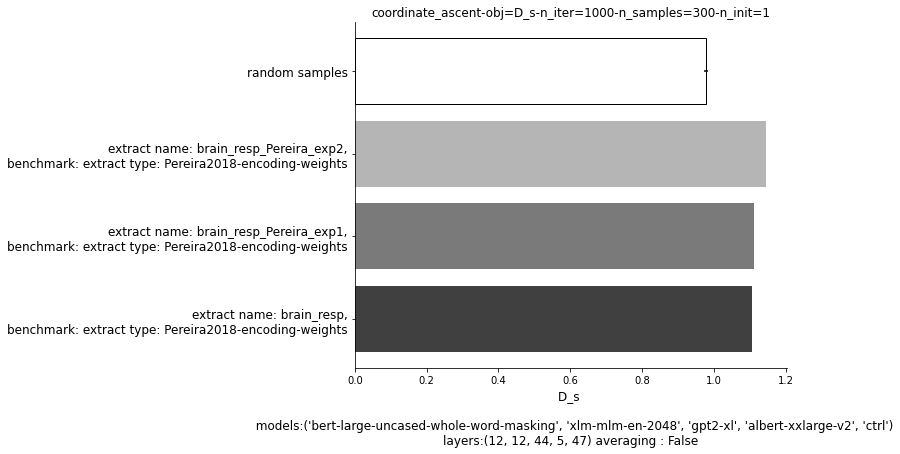

In [168]:
fig = plt.figure(figsize=[15,8])
ax = fig.add_axes([.1,.1,.4,.6])

cmap=cm.get_cmap('Greys')

alph_col=np.flipud(cmap(np.divide(range(len(optim_results)+2),len(optim_results)+2)))
tick_l=[]
tick=[]
for idx, res in enumerate(optim_results):
    ax.barh(idx,res['optimized_d'],color=alph_col[[idx],:],label=res['optimizatin_name'])
    ext_obj=extract_pool[res['extractor_name']]()
    tick_l.append(f"extract name: {ext_obj.extract_name},\nbenchmark: extract type: {ext_obj.extract_benchmark}")
    tick.append(idx)

ax.barh(len(optim_results),np.mean(Pereira_rand),xerr=np.std(Pereira_rand),color=(1,1,1),edgecolor=(0,0,0),label=res['optimizatin_name'])
tick_l.append(f"random samples")
tick.append(len(optim_results))
    
ax.set_xlabel(f"D_s \n\n  models:{ext_obj.model_spec}\nlayers:{ext_obj.layer_spec} averaging : {ext_obj.average_sentence}",fontsize=12)
ax.set_yticklabels(tick_l,fontsize=12)
ax.set_yticks(tick)
ax.set_title(res['optimizatin_name'],fontsize=12)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Example sentences : 

In [37]:
select_sent=[]
for idx, res in enumerate(optim_results):
    ext_obj=extract_pool[res['extractor_name']]()
    ext_obj.load_dataset()
    values=[ext_obj.data_[id]['text'] for id in res['optimized_S']]
    with open(os.path.join(RESULTS_DIR,f"sentences_{res['extractor_name']}_{res['optimizatin_name']}.txt"), 'w') as f:
        for item in values:
            f.write("%s\n" % item)


loading /Users/eghbalhosseini/MyData/Universal Dependencies 2.6/ud_sentence_data_token_filter_v3_no_dup.pkl


901it [00:00, 208511.80it/s]
901it [00:00, 186546.94it/s]
901it [00:00, 204772.03it/s]
901it [00:00, 205574.06it/s]
901it [00:00, 210662.13it/s]
901it [00:00, 200364.13it/s]
901it [00:00, 209633.77it/s]
901it [00:00, 201614.80it/s]
902it [00:00, 210356.53it/s]


loading /Users/eghbalhosseini/MyData/Universal Dependencies 2.6/ud_sentence_data_token_filter_v3_no_dup.pkl


901it [00:00, 186041.84it/s]
901it [00:00, 187119.62it/s]
901it [00:00, 212749.42it/s]
901it [00:00, 199866.08it/s]
901it [00:00, 192152.74it/s]
901it [00:00, 196980.34it/s]
901it [00:00, 203668.44it/s]
901it [00:00, 197970.97it/s]
902it [00:00, 194772.56it/s]


loading /Users/eghbalhosseini/MyData/Universal Dependencies 2.6/ud_sentence_data_token_filter_v3_no_dup.pkl


901it [00:00, 197846.60it/s]
901it [00:00, 185475.73it/s]
901it [00:00, 192967.11it/s]
901it [00:00, 200183.70it/s]
901it [00:00, 184183.05it/s]
901it [00:00, 198553.45it/s]
901it [00:00, 175460.48it/s]
901it [00:00, 172339.84it/s]
902it [00:00, 200543.98it/s]


In [ ]:
os.path.join(RESULTS_DIR,f"sentences_{res['extractor_name']}_{res['optimizatin_name']}.txt")

'/Users/eghbalhosseini/MyData/sent_sampling/results/sentences_group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp-bench=Fedorenko2016v3-encoding-weights-ave=False_coordinate_ascent-obj=D_s-n_iter=1000-n_samples=300-n_init=1.txt'

array([4, 1, 3, 4, 0, 0, 0, 1, 1, 1])